# 1.	**Analyse customer behaviour to segment customers for targeted marketing.**

Dataset: https://archive.ics.uci.edu/ml/datasets/Online+Retail+II


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("Online_Retail_II.csv",on_bad_lines='skip')

In [7]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
99480,498736,21790,VINTAGE SNAP CARDS,5,2/22/2010 16:04,0.85,12748.0,United Kingdom
99481,498736,20977,36 PENCILS TUBE WOODLAND,6,2/22/2010 16:04,1.25,12748.0,United Kingdom
99482,498736,20978,36 PENCILS TUBE SKULLS,5,2/22/2010 16:04,1.25,12748.0,United Kingdom
99483,498736,20978,36 PENCILS TUBE SKULLS,16,2/22/2010 16:04,1.25,12748.0,United Kingdom


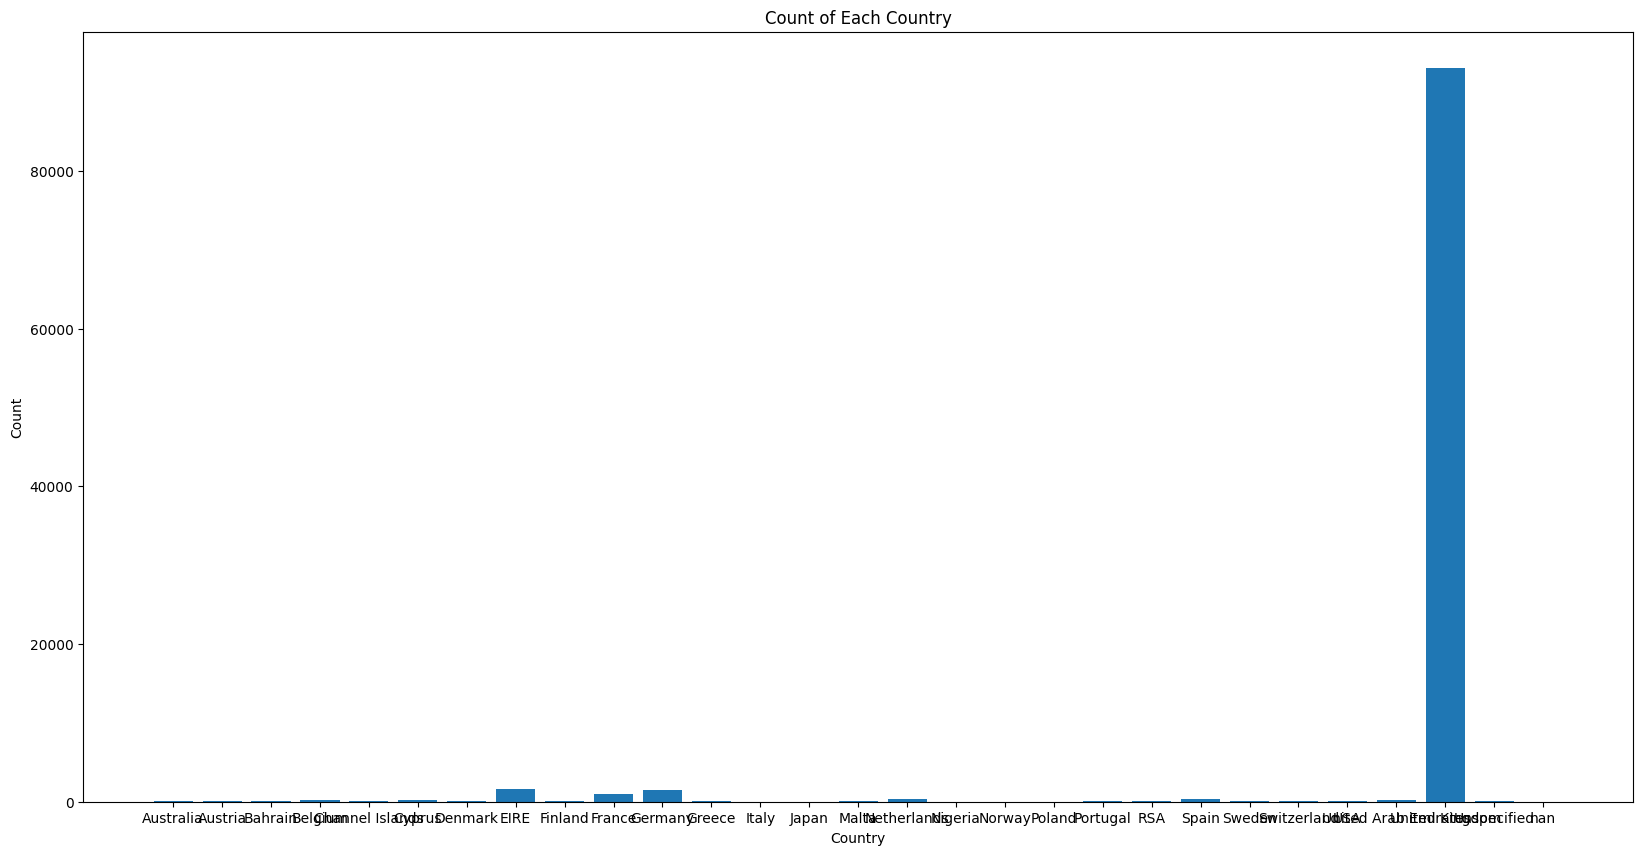

In [12]:
import numpy as np
import matplotlib.pyplot as plt
unique_countries = np.sort(df["Country"].astype(str).unique())
country_counts = df["Country"].value_counts()
country_counts = country_counts.reindex(unique_countries, fill_value=0)
plt.figure(figsize=(20, 10))
plt.bar(unique_countries, country_counts)
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Count of Each Country")
plt.show()

29


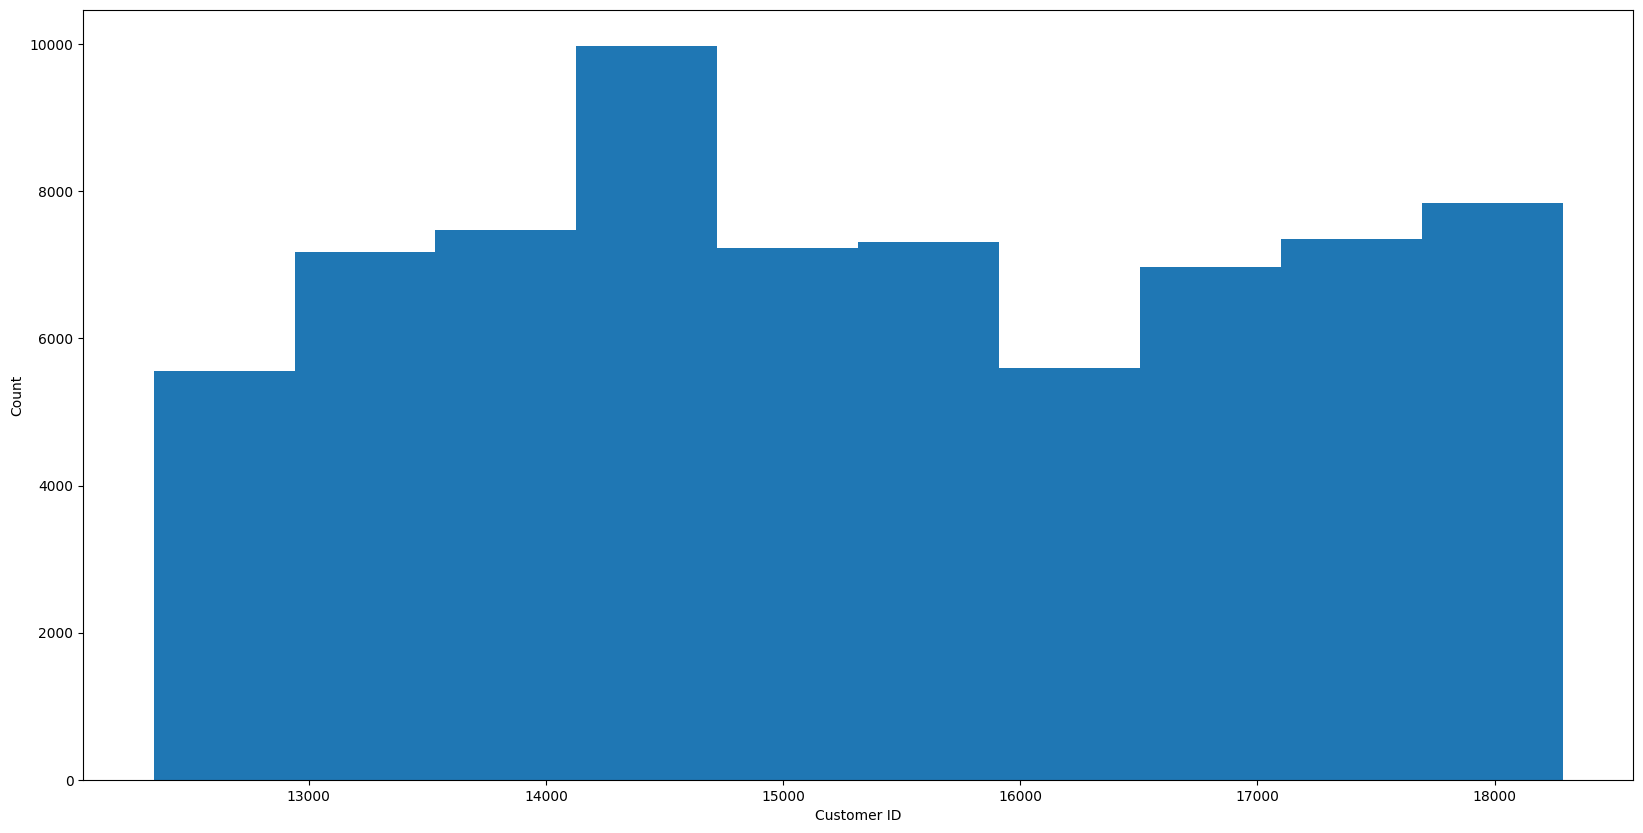

In [14]:
import numpy as np
import matplotlib.pyplot as plt
unique_customer_ids = np.sort(df["Country"].astype(str).unique())
print(len(unique_customer_ids))
plt.figure(figsize=(20, 10))
plt.hist(df["Customer ID"])
plt.xlabel("Customer ID")
plt.ylabel("Count")
plt.show()


# **2.	Build a machine learning model to predict the likelihood of a patient having heart disease based on various medical attributes.**

Dataset: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [21]:
df = pd.read_csv("Heart_Disease.csv",on_bad_lines='skip')

In [15]:
!pip install ucimlrepo

In [16]:
from ucimlrepo import fetch_ucirepo
heart_disease = fetch_ucirepo(id=45)
x = heart_disease.data.features
y = heart_disease.data.targets
x=x.dropna(axis=0)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


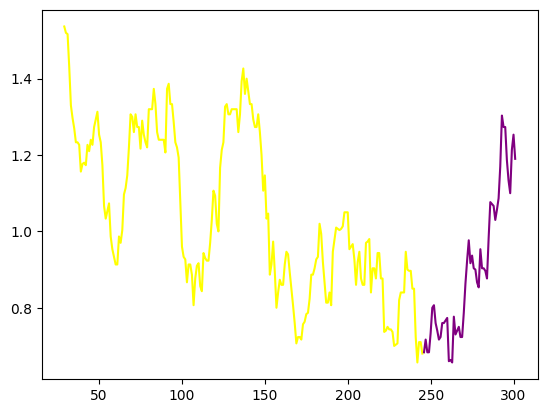

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

model = LinearRegression()
returns = x.oldpeak
returns = returns.rolling(window=30).mean().dropna()

n_observations = len(returns)
returns_train = returns.iloc[:int(0.8 * n_observations)]
returns_test = returns.iloc[int(0.8 * n_observations):]

_ = plt.plot(dpi=150)
plt.plot(returns_train.index, returns_train, c="yellow")
plt.plot(returns_test.index, returns_test, c="purple")
plt.show()

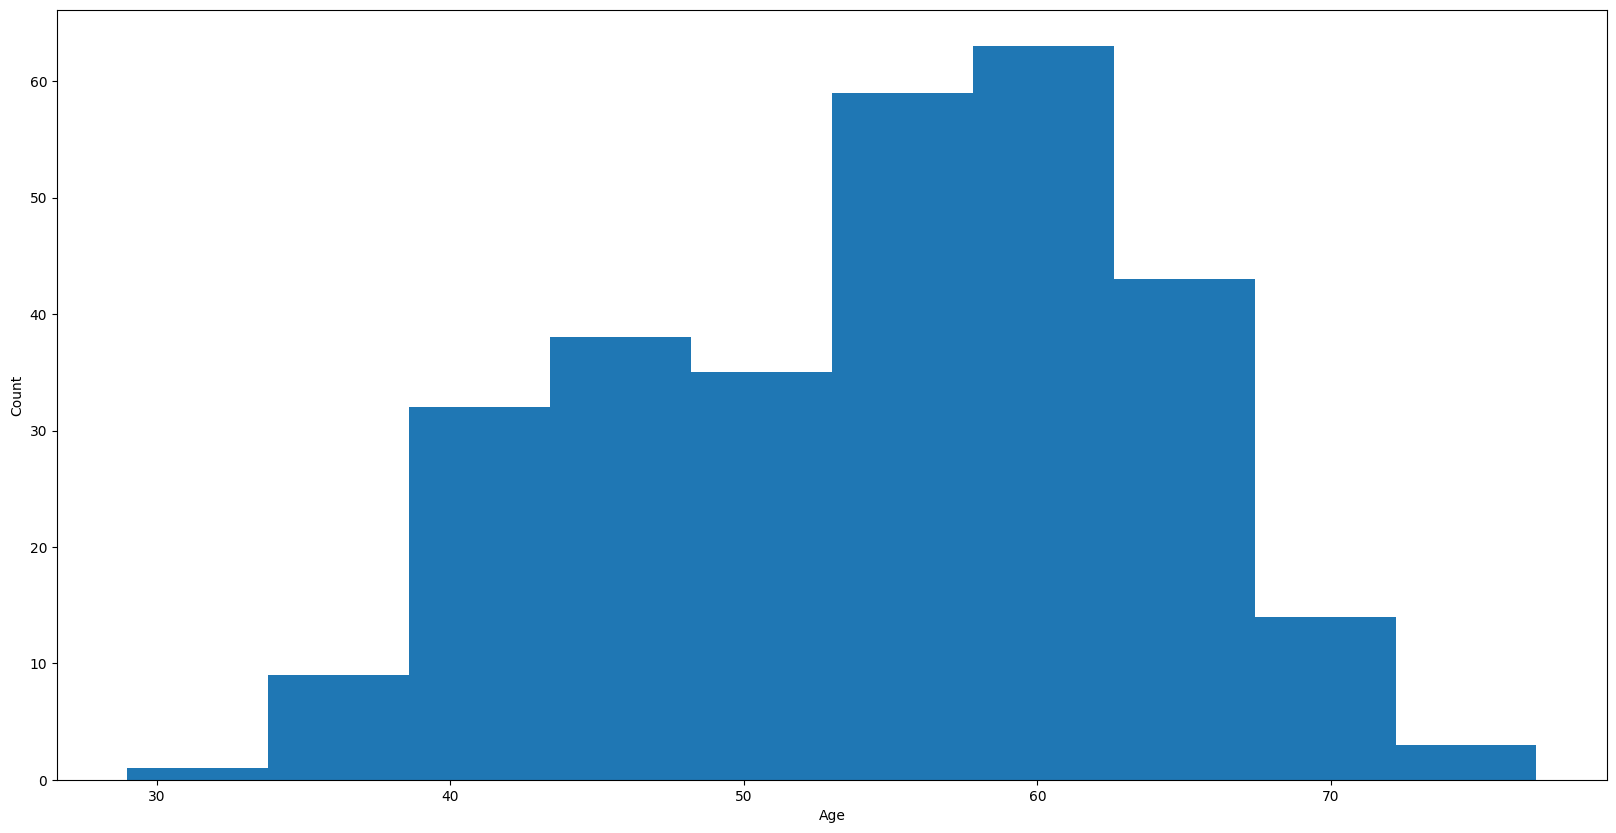

In [18]:
_ = plt.figure(figsize=(20, 10))
plt.hist(x.age)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# **3. Build a recommendation system that suggests movies to users based on their viewing history and preferences.**

Dataset: https://www.kaggle.com/datasets/dev0914sharma/dataset


In [25]:
pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163694 sha256=e63fbd4ed487f57fc7217f779320acb0ca3c6ad9fe79ae54abe8b4142c842a77
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [28]:
import pandas as pd
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
data = pd.DataFrame({
    'user_id': [1, 1, 2, 2, 3, 3, 4, 4, 5, 5],
    'movie_id': [101, 102, 101, 103, 102, 104, 105, 103, 101, 105],
    'rating': [5, 4, 3, 2, 4, 5, 3, 4, 5, 2]
})

# Get unique movie IDs from the original DataFrame
unique_movie_ids = data['movie_id'].unique()

# Define the reader
reader = Reader(rating_scale=(1, 5))

# Load the dataset
data = Dataset.load_from_df(data[['user_id', 'movie_id', 'rating']], reader)

# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2)

# Create a collaborative filtering model (user-based)
sim_options = {
    'name': 'cosine',  # Use cosine similarity
    'user_based': True  # Use user-based collaborative filtering
}
model = KNNBasic(sim_options=sim_options)

# Train the model
model.fit(trainset)

# Example: Recommend movies for user_id 1
user_id_to_recommend = 1

# Filter movies based on predicted ratings
movies_to_recommend = [movie_id for movie_id in unique_movie_ids if model.predict(user_id_to_recommend, movie_id).est > 3]
print(f"Recommended movies for user {user_id_to_recommend}: {movies_to_recommend}")




Computing the cosine similarity matrix...
Done computing similarity matrix.
Recommended movies for user 1: [101, 102, 104]


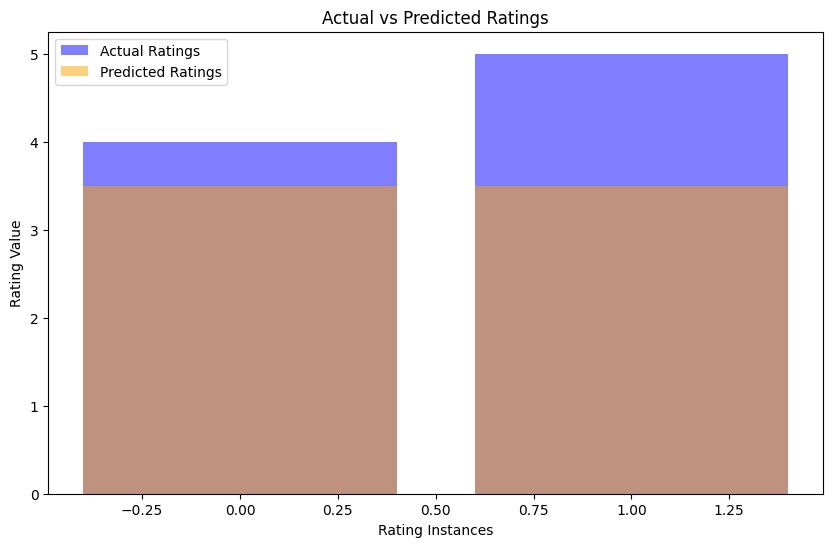

RMSE: 1.1180
RMSE: 1.118033988749895
MAE:  1.0000
MAE: 1.0


In [29]:
import matplotlib.pyplot as plt
from surprise.accuracy import rmse
from surprise import accuracy
def get_actual_predicted_ratings(predictions):
    actual_ratings = [pred.r_ui for pred in predictions]
    predicted_ratings = [pred.est for pred in predictions]
    return actual_ratings, predicted_ratings

predictions = model.test(testset)
actual_ratings, predicted_ratings = get_actual_predicted_ratings(predictions)
plt.figure(figsize=(10, 6))
plt.bar(range(len(actual_ratings)), actual_ratings, alpha=0.5, color='blue', label='Actual Ratings')
plt.bar(range(len(predicted_ratings)), predicted_ratings, alpha=0.5, color='orange', label='Predicted Ratings')
plt.xlabel('Rating Instances')
plt.ylabel('Rating Value')
plt.title('Actual vs Predicted Ratings')
plt.legend()
plt.show()
rmse_value = rmse(predictions)
print(f"RMSE: {rmse_value}")
mae_value = accuracy.mae(predictions)
print(f"MAE: {mae_value}")


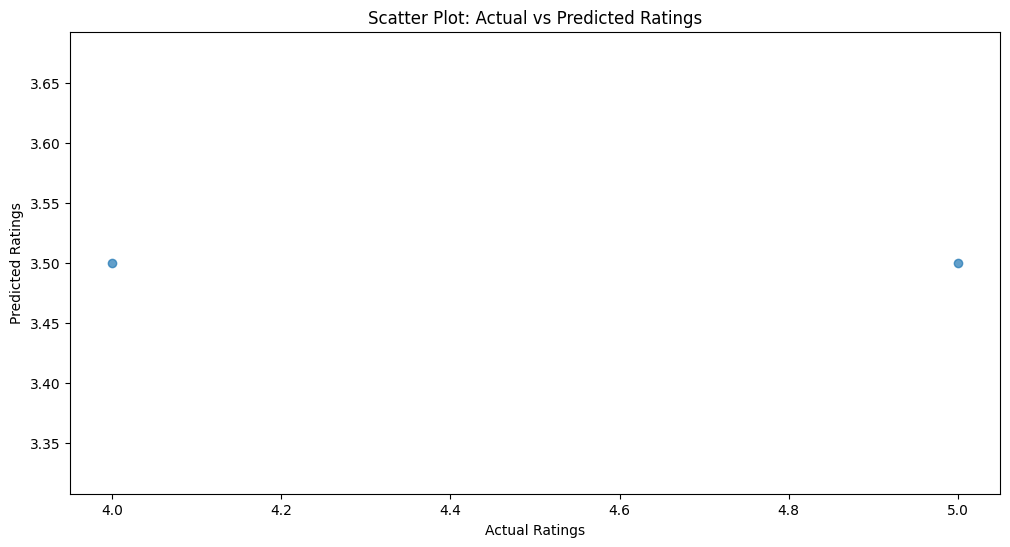

In [30]:
plt.figure(figsize=(12, 6))
plt.scatter(actual_ratings, predicted_ratings, alpha=0.7)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Scatter Plot: Actual vs Predicted Ratings')
plt.show()

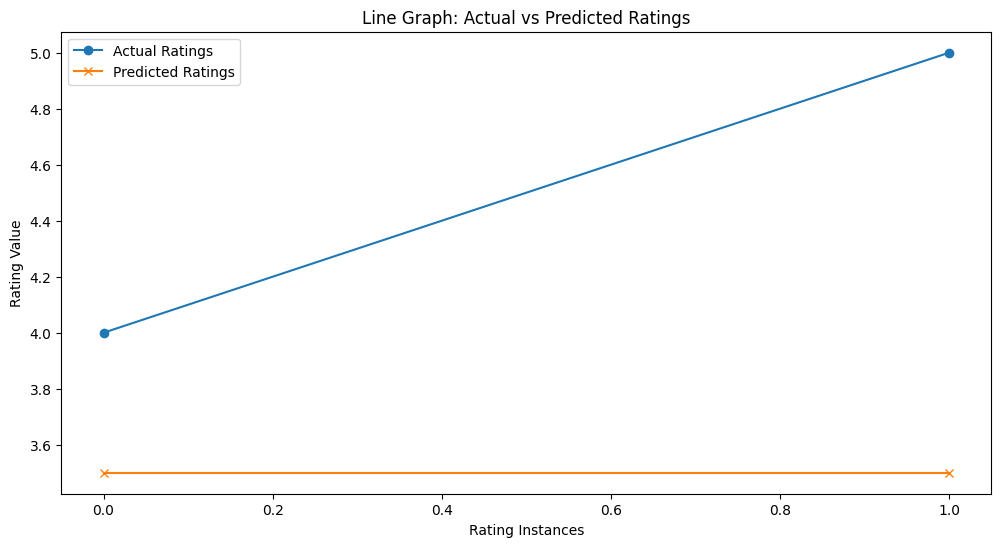

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(actual_ratings, label='Actual Ratings', marker='o')
plt.plot(predicted_ratings, label='Predicted Ratings', marker='x')
plt.xlabel('Rating Instances')
plt.ylabel('Rating Value')
plt.title('Line Graph: Actual vs Predicted Ratings')
plt.legend()
plt.show()

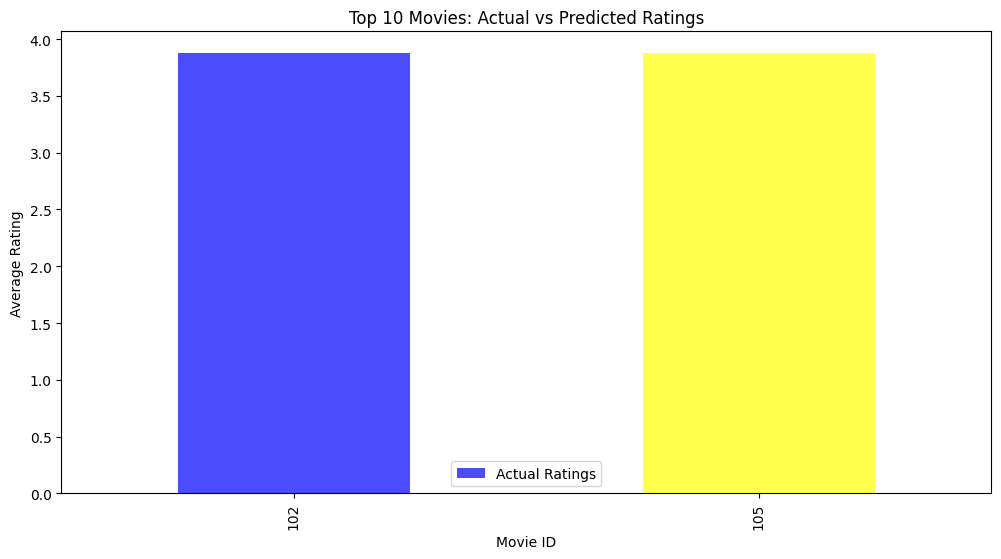

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
from surprise.accuracy import rmse
from surprise import accuracy
plt.figure(figsize=(12, 6))
top_10_movies.plot(kind='bar', color=['blue', 'yellow'], alpha=0.7)
plt.xlabel('Movie ID')
plt.ylabel('Average Rating')
plt.title('Top 10 Movies: Actual vs Predicted Ratings')
plt.legend(['Actual Ratings', 'Predicted Ratings'])
plt.show()
